<a href="https://colab.research.google.com/github/MohammedAlaaraj/HIGGS_261/blob/main/NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
import pickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
column_names = ['class', 'lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi',
                'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi',
                'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta',
                'jet 4 phi', 'jet 4 b-tag', 'm jj', 'm jjj', 'm lv', 'm jlv', 'm bb', 'm wbb', 'm wwbb']

In [ ]:
df = pd.read_csv('/content/HIGGS_train.csv',header=None,names = column_names)

<ipython-input-28-8e6e8841413b>:1: DtypeWarning: Columns (8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/HIGGS_train.csv',header=None,names = column_names)


In [ ]:
df.head()

,class,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m jj,m jjj,m lv,m jlv,m bb,m wbb,m wwbb
0,1.0,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.09,0.00,...,-0.0105,-0.045800,3.1,1.350,0.980,0.978,0.920,0.722,0.989,0.877
1,1.0,0.908,0.329,0.359,1.500,-0.313,1.100,-0.558,-1.59,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1.0,0.799,1.470,-1.640,0.454,0.426,1.100,1.280,1.38,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
3,0.0,1.340,-0.877,0.936,1.990,0.882,1.790,-1.650,-0.942,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
4,1.0,1.110,0.321,1.520,0.883,-1.210,0.681,-1.070,-0.922,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808


Data preprocessing

In [ ]:
# Checking if there are duplicated rows in the data frame 
df.duplicated().any()

True

In [ ]:
# We realize that duplicated rows exist in our data base so we remove them 
df = df.drop_duplicates()
df.duplicated().any()

False

In [ ]:
# I will check the type of each column in the data frame to ensure no wrong converstions have took place
for column in df.columns:
    print(column,":",df[column].dtypes) 
# 'dtype('o')' is python object which means these columns have mixed types
# We'll take a closer look
columns_mixed = []
for column in df.columns:
  if(df[column].dtypes) != 'float64':
    columns_mixed.append(column)
# mark mixed columns
print(columns_mixed)


class : float64
lepton pT : float64
lepton eta : float64
lepton phi : float64
missing energy magnitude : float64
missing energy phi : float64
jet 1 pt : float64
jet 1 eta : float64
jet 1 phi : object
jet 1 b-tag : float64
jet 2 pt : float64
jet 2 eta : float64
jet 2 phi : float64
jet 2 b-tag : float64
jet 3 pt : float64
jet 3 eta : float64
jet 3 phi : float64
jet 3 b-tag : float64
jet 4 pt : float64
jet 4 eta : float64
jet 4 phi : float64
jet 4 b-tag : object
m jj : float64
m jjj : float64
m lv : float64
m jlv : float64
m bb : float64
m wbb : float64
m wwbb : float64
['jet 1 phi', 'jet 4 b-tag']


In [ ]:
for column in columns_mixed:
  print(df[column].unique())

# We find these values that are causing the trouble "1.01" 'error' 's'

# perform the replacements/imputations
df['jet 1 phi'] = df['jet 1 phi'].replace('"1.01"',1.01)
df['jet 4 b-tag'] = df['jet 4 b-tag'].replace('error',np.NaN)
df['jet 4 b-tag'] = df['jet 4 b-tag'].replace('s',np.NaN)
df['jet 1 phi'] = df['jet 1 phi'].astype(float)
df['jet 4 b-tag'] = df['jet 4 b-tag'].astype(float)

[-1.09 -1.59 1.38 ... '3.50E-01' '-6.59E-03' '"1.01"']
[3.1 0.0 1.55 '0.00E+00' '3.10E+00' '1.55E+00' 'error' 's']


In [ ]:
# Recheck 
for column in columns_mixed:
  print(df[column].unique())


[-1.09    -1.59     1.38    ... -0.00216 -0.0587   0.00959]
[3.1  0.   1.55  nan]


In [ ]:
# I will check for anomalies and null variables
for column in df.columns:
    print(column,":",df[column].isnull().any()) 
  
columns_null = []
for column in df.columns:
  if(df[column].isnull().any()):
    columns_null.append(column)
print(columns_null)

class : False
lepton pT : False
lepton eta : False
lepton phi : False
missing energy magnitude : False
missing energy phi : False
jet 1 pt : False
jet 1 eta : False
jet 1 phi : False
jet 1 b-tag : False
jet 2 pt : False
jet 2 eta : False
jet 2 phi : False
jet 2 b-tag : False
jet 3 pt : False
jet 3 eta : False
jet 3 phi : False
jet 3 b-tag : True
jet 4 pt : False
jet 4 eta : False
jet 4 phi : False
jet 4 b-tag : True
m jj : False
m jjj : False
m lv : False
m jlv : False
m bb : False
m wbb : False
m wwbb : False
['jet 3 b-tag', 'jet 4 b-tag']


In [ ]:
# I will drop all rows tha contain a null entry across all columns
df = df.dropna()

In [ ]:
# Recheck
for column in df.columns:
    print(column,":",df[column].isnull().any()) 
  
columns_null = []
for column in df.columns:
  if(df[column].isnull().any()):
    columns_null.append(column)
print(columns_null)

class : False
lepton pT : False
lepton eta : False
lepton phi : False
missing energy magnitude : False
missing energy phi : False
jet 1 pt : False
jet 1 eta : False
jet 1 phi : False
jet 1 b-tag : False
jet 2 pt : False
jet 2 eta : False
jet 2 phi : False
jet 2 b-tag : False
jet 3 pt : False
jet 3 eta : False
jet 3 phi : False
jet 3 b-tag : False
jet 4 pt : False
jet 4 eta : False
jet 4 phi : False
jet 4 b-tag : False
m jj : False
m jjj : False
m lv : False
m jlv : False
m bb : False
m wbb : False
m wwbb : False
[]


In [ ]:
# Here we are performing a 80-20 split on the data

target = df['class']
features = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(479487, 28)
(119872, 28)
(479487,)
(119872,)


Building our first model

In [ ]:
# We will start by building a simple logistic regression model 

model = LogisticRegression(C = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the testing data set:', accuracy)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print('Accuracy on the training data set:',accuracy)

Accuracy on the testing data set: 0.6404998665242926
Accuracy on the training data set: 0.6417671386294101


We get the same accuracy which means the model is not performing well due to being too simple, just like we expected 

We move on to building another model, this time we will try to build a random forest model

In [ ]:
model = RandomForestClassifier(criterion='entropy')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the testing data set:', accuracy)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy on the training data set:", accuracy)

Accuracy on the testing data set: 0.7319390683395622
Accuracy on the training data set: 0.999997914437722


In [ ]:
# I suspect that the model is overfitting
model = RandomForestClassifier(n_estimators= 20,criterion='entropy')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the testing data set:', accuracy)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy on the training data set:", accuracy)

Accuracy on the testing data set: 0.7117174986652429
Accuracy on the training data set: 0.9980166302736049


In [ ]:
for tree in model.estimators_:
    depth = tree.tree_.max_depth
    print("depth:", depth)

depth: 48
depth: 44
depth: 46
depth: 48
depth: 45
depth: 46
depth: 45
depth: 48
depth: 47
depth: 50
depth: 49
depth: 42
depth: 44
depth: 47
depth: 48
depth: 48
depth: 45
depth: 47
depth: 46
depth: 46


In [ ]:
model = RandomForestClassifier(max_depth = 14,criterion='entropy')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the testing data set:', accuracy)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy on the training data set:", accuracy)

Accuracy on the testing data set: 0.7230545915643353
Accuracy on the training data set: 0.7842840368977678


In [ ]:
model = xgb.XGBClassifier(eta = 0.5, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the testing data set:', accuracy)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy on the training data set:", accuracy)

Accuracy on the testing data set: 0.7346836625734117
Accuracy on the training data set: 0.7649550457050973


Neural network

In [ ]:
# I'll start by implementing a 4 layer neural network with an emphasis on the width


'''
Neural Network with an emphasis on width
'''
input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(512, activation='sigmoid')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(256, activation='sigmoid')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(128, activation='sigmoid')(hidden_layer_2)


output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_3)


model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


model.summary()
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)
filename = 'model5.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_35 (Dense)            (None, 512)               14848     
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dense_38 (Dense)            (None, 1)                 129       
                                                                 
Total params: 179,201
Trainable params: 179,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)

Epoch 1/20
14984/14984 [==============================] - 125s 8ms/step - loss: 0.6095 - accuracy: 0.6621 - val_loss: 0.6061 - val_accuracy: 0.6698
Epoch 2/20
14984/14984 [==============================] - 121s 8ms/step - loss: 0.5828 - accuracy: 0.6887 - val_loss: 0.5790 - val_accuracy: 0.6910
Epoch 3/20
14984/14984 [==============================] - 132s 9ms/step - loss: 0.5683 - accuracy: 0.7006 - val_loss: 0.5648 - val_accuracy: 0.7055
Epoch 4/20
14984/14984 [==============================] - 139s 9ms/step - loss: 0.5554 - accuracy: 0.7115 - val_loss: 0.5490 - val_accuracy: 0.7165
Epoch 5/20
14984/14984 [==============================] - 130s 9ms/step - loss: 0.5460 - accuracy: 0.7186 - val_loss: 0.5414 - val_accuracy: 0.7219
Epoch 6/20
14984/14984 [==============================] - 119s 8ms/step - loss: 0.5382 - accuracy: 0.7243 - val_loss: 0.5341 - val_accuracy: 0.7284
Epoch 7/20
14984/14984 [==============================] - 131s 9ms/step - loss: 0.5316 - accuracy: 0.7286 - val_

In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.7692345976829529
Testing accuracy: 0.7441604137420654


In [ ]:
# Saving the model for now
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# I'll start by implementing a 4 layer neural network with an emphasis on the width


'''
Same model but with a additional layer
'''
input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(512, activation='sigmoid')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(256, activation='sigmoid')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(128, activation='sigmoid')(hidden_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(64, activation='sigmoid')(hidden_layer_3)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_4)


model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_9 (Dense)             (None, 512)               14848     
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 187,393
Trainable params: 187,393
Non-trainab

In [ ]:
model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)
filename = 'model2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

Epoch 1/20
14984/14984 [==============================] - 128s 8ms/step - loss: 0.6166 - accuracy: 0.6515 - val_loss: 0.5850 - val_accuracy: 0.6870
Epoch 2/20
14984/14984 [==============================] - 131s 9ms/step - loss: 0.5809 - accuracy: 0.6896 - val_loss: 0.5711 - val_accuracy: 0.6984
Epoch 3/20
14984/14984 [==============================] - 121s 8ms/step - loss: 0.5641 - accuracy: 0.7035 - val_loss: 0.5511 - val_accuracy: 0.7138
Epoch 4/20
14984/14984 [==============================] - 120s 8ms/step - loss: 0.5521 - accuracy: 0.7129 - val_loss: 0.5438 - val_accuracy: 0.7208
Epoch 5/20
14984/14984 [==============================] - 132s 9ms/step - loss: 0.5432 - accuracy: 0.7197 - val_loss: 0.5367 - val_accuracy: 0.7257
Epoch 6/20
14984/14984 [==============================] - 135s 9ms/step - loss: 0.5348 - accuracy: 0.7255 - val_loss: 0.5315 - val_accuracy: 0.7284
Epoch 7/20
14984/14984 [==============================] - 121s 8ms/step - loss: 0.5276 - accuracy: 0.7304 - val_

In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.7714265584945679
Testing accuracy: 0.7446776628494263


In [ ]:

'''
Same model but with a additional layer
'''
input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(1024, activation='sigmoid')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(512, activation='sigmoid')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(256, activation='sigmoid')(hidden_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(128, activation='sigmoid')(hidden_layer_3)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_4)


model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_14 (Dense)            (None, 1024)              29696     
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 718,849
Trainable params: 718,849
Non-trainab

In [ ]:
model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)
filename = 'model3.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

Epoch 1/20
14984/14984 [==============================] - 327s 22ms/step - loss: 0.4581 - accuracy: 0.7760 - val_loss: 0.4467 - val_accuracy: 0.7829
Epoch 2/20
14984/14984 [==============================] - 299s 20ms/step - loss: 0.4531 - accuracy: 0.7791 - val_loss: 0.4403 - val_accuracy: 0.7871
Epoch 3/20
14984/14984 [==============================] - 324s 22ms/step - loss: 0.4479 - accuracy: 0.7822 - val_loss: 0.4383 - val_accuracy: 0.7894
Epoch 4/20
14984/14984 [==============================] - 298s 20ms/step - loss: 0.4425 - accuracy: 0.7858 - val_loss: 0.4316 - val_accuracy: 0.7936
Epoch 5/20
14984/14984 [==============================] - 326s 22ms/step - loss: 0.4370 - accuracy: 0.7885 - val_loss: 0.4234 - val_accuracy: 0.7974
Epoch 6/20
14984/14984 [==============================] - 300s 20ms/step - loss: 0.4313 - accuracy: 0.7922 - val_loss: 0.4193 - val_accuracy: 0.7997
Epoch 7/20
14984/14984 [==============================] - 326s 22ms/step - loss: 0.4251 - accuracy: 0.7961

In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.8500292897224426
Testing accuracy: 0.7236135005950928


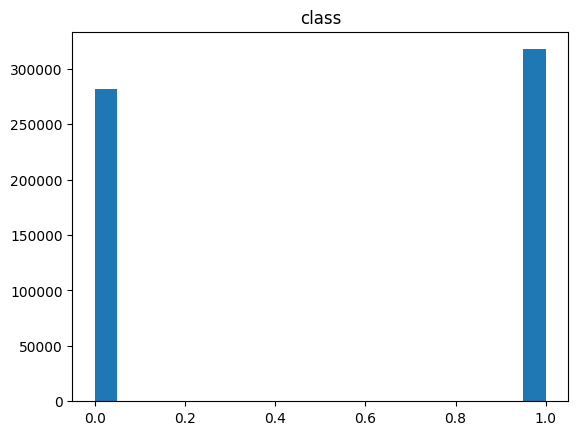

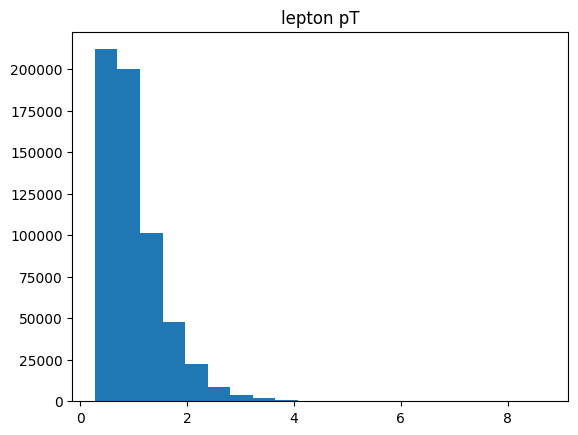

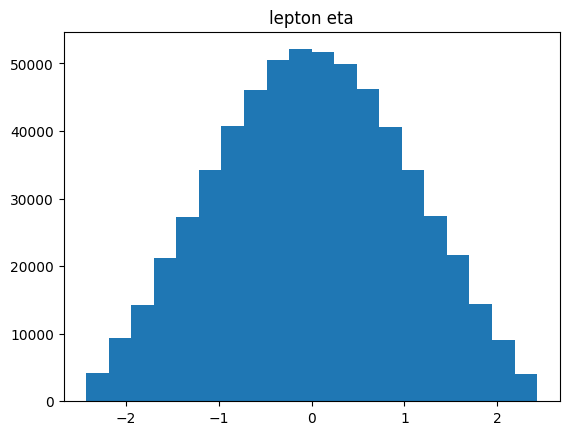

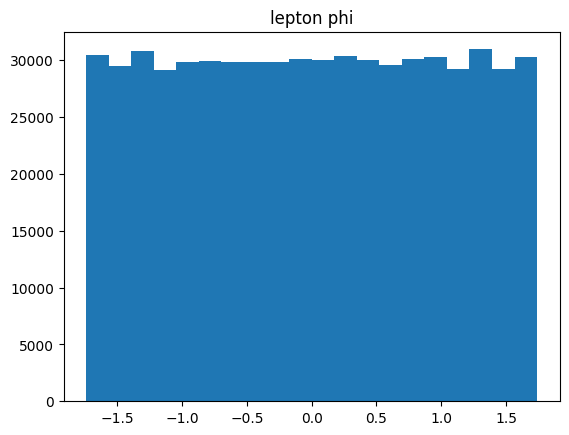

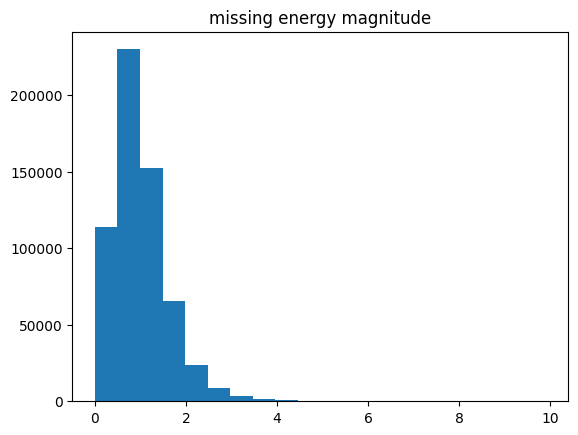

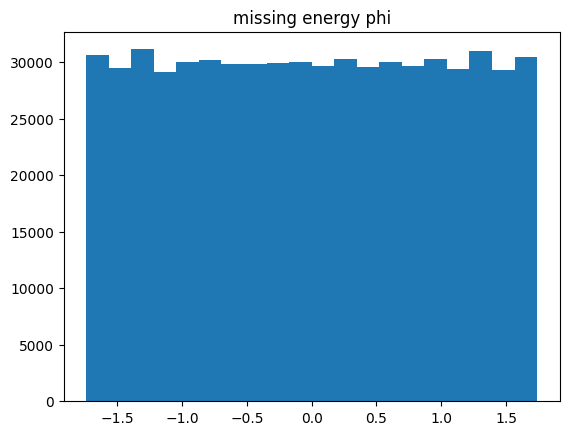

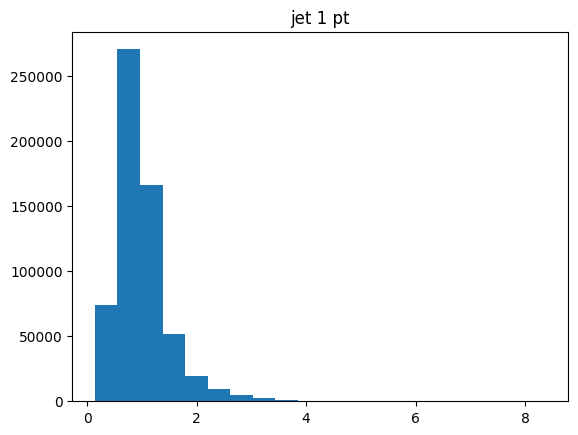

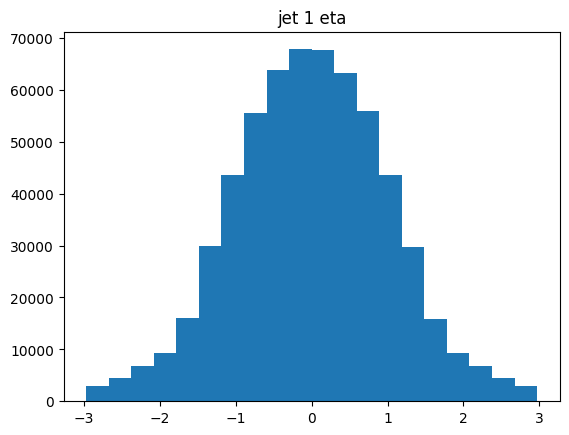

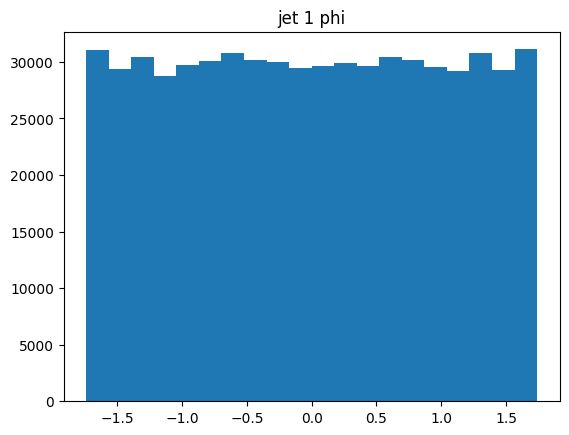

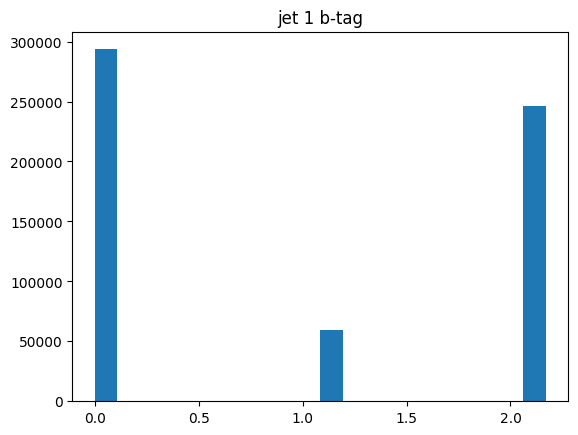

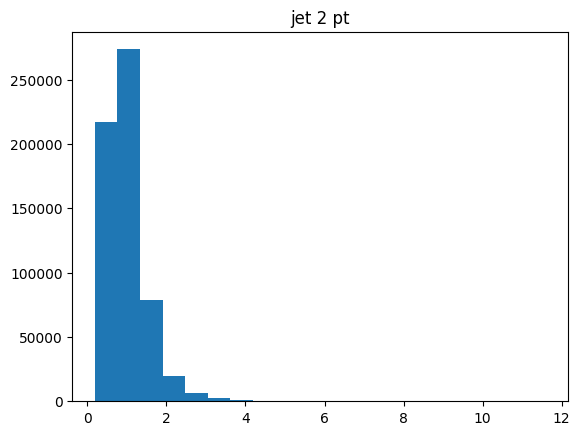

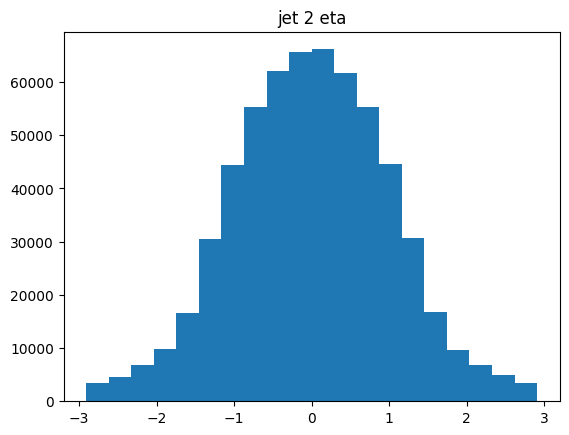

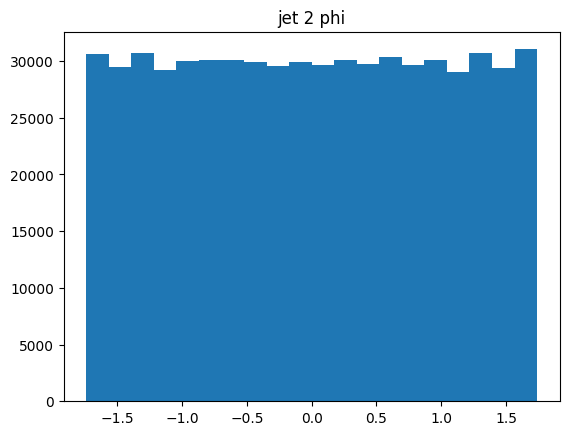

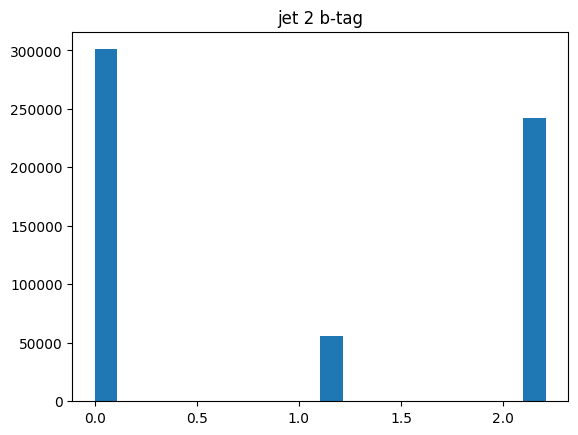

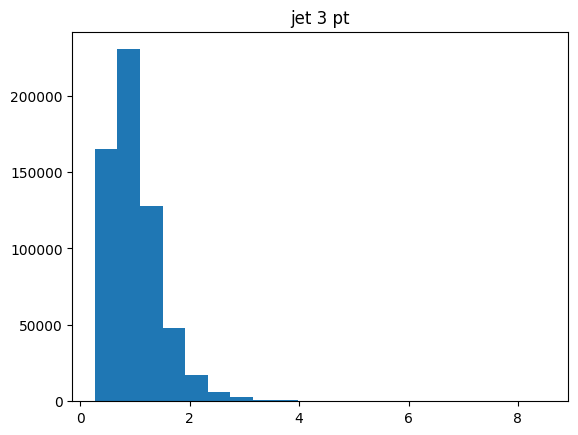

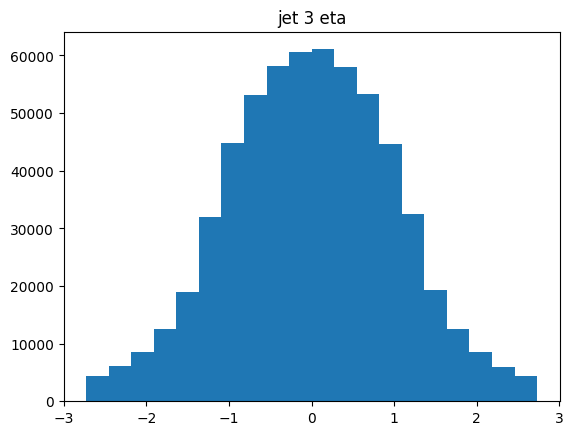

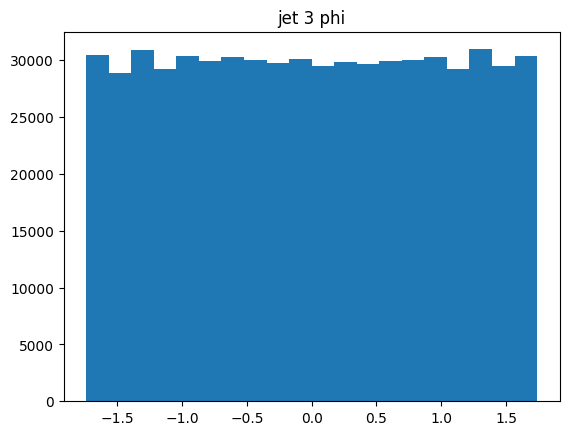

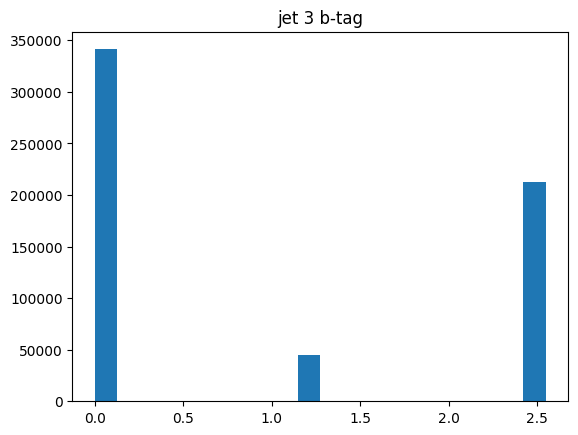

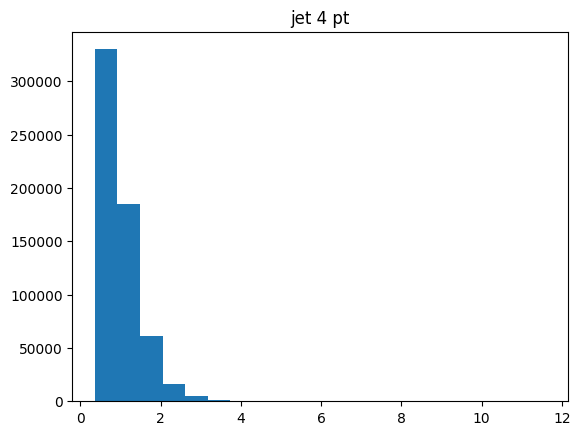

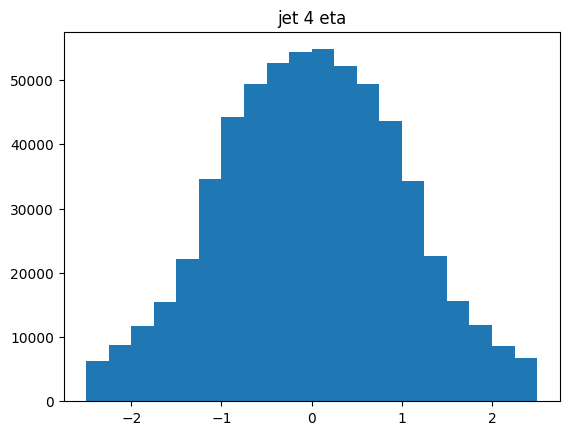

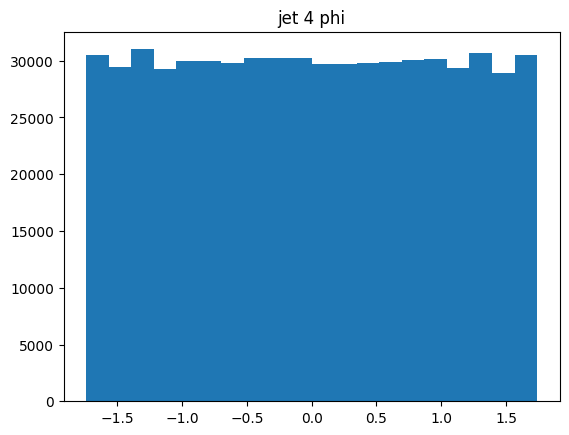

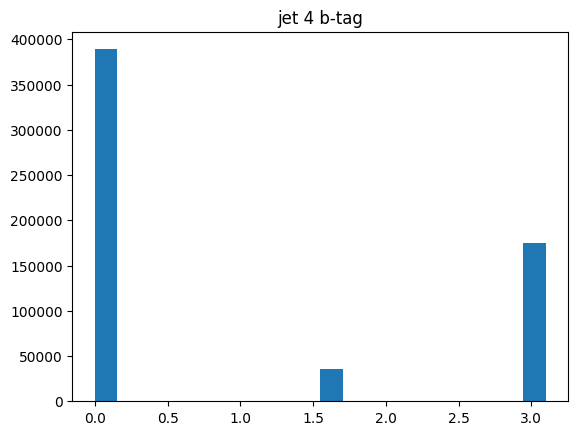

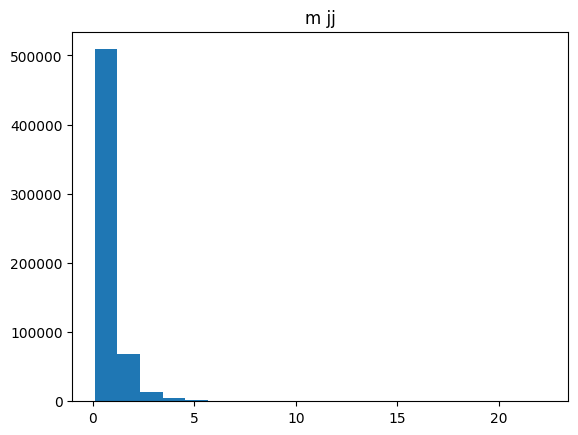

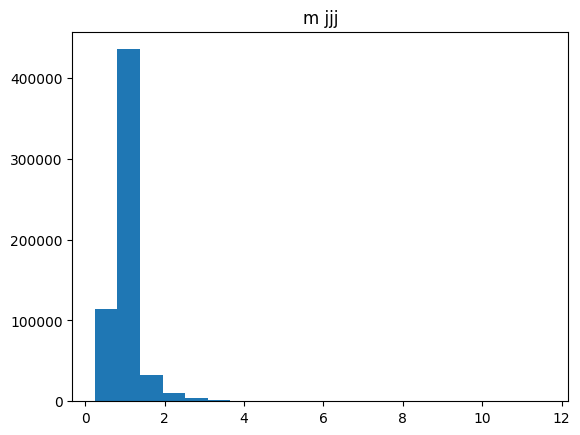

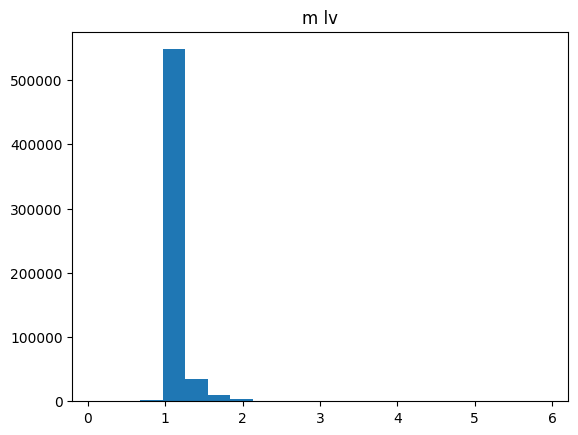

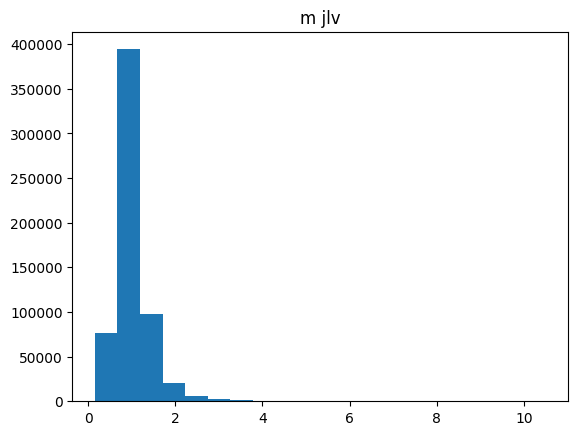

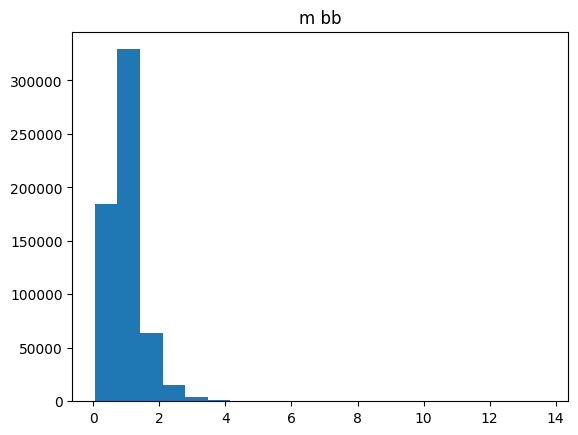

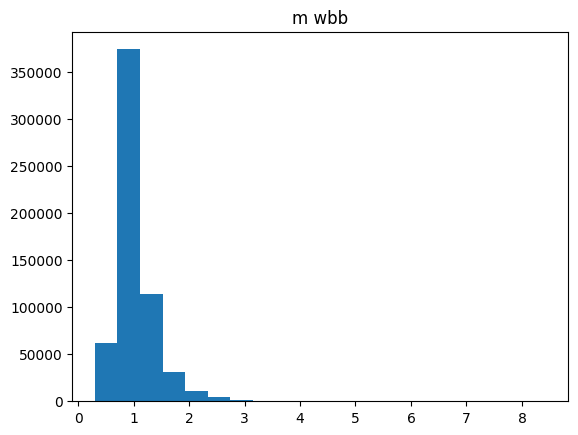

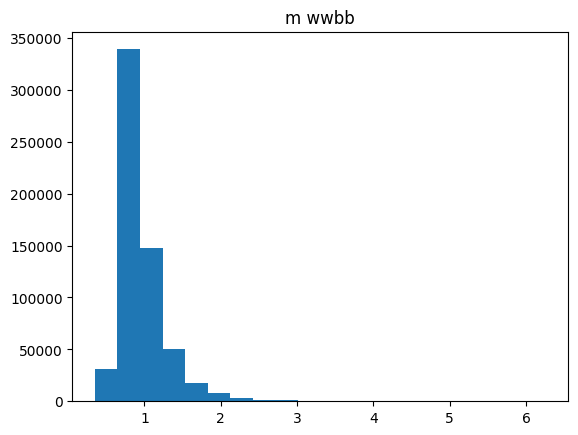

In [ ]:
# Will try to scale the data using min-max scaler and x-score scaler based on the distribution
# then I will train some models
for column in df.columns:
    fig, ax = plt.subplots()
    ax.hist(df[column], bins=20)
    ax.set_title(column)
    plt.show()

In [ ]:
# features that don't follow a guassian distribution
columns_NonGaussian = ['jet 3 pt','jet 4 pt','m jj']

scaler = MinMaxScaler()

df[columns_NonGaussian] = pd.DataFrame(scaler.fit_transform(df[columns_NonGaussian]), columns=columns_NonGaussian)

In [ ]:
columns_Gaussian = []

for c in df.columns:
  if c not in columns_NonGaussian and c != 'class':
    columns_Gaussian.append(c)

scaler = StandardScaler()

df[columns_Gaussian] = pd.DataFrame(scaler.fit_transform(df[columns_Gaussian]), columns=columns_Gaussian)

['jet 3 pt', 'jet 4 pt', 'm jj']


In [ ]:

input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(1024, activation='sigmoid')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(512, activation='sigmoid')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(256, activation='sigmoid')(hidden_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(128, activation='sigmoid')(hidden_layer_3)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_4)


model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              29696     
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 718,849
Trainable params: 718,849
Non-trainab

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=30)
filename = 'model3.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

Epoch 1/30
14984/14984 [==============================] - 358s 24ms/step - loss: 0.6238 - accuracy: 0.6398 - val_loss: 0.5876 - val_accuracy: 0.6833
Epoch 2/30
14984/14984 [==============================] - 315s 21ms/step - loss: 0.5802 - accuracy: 0.6898 - val_loss: 0.5673 - val_accuracy: 0.7028
Epoch 3/30
14984/14984 [==============================] - 316s 21ms/step - loss: 0.5619 - accuracy: 0.7056 - val_loss: 0.5701 - val_accuracy: 0.6979
Epoch 4/30
14984/14984 [==============================] - 314s 21ms/step - loss: 0.5489 - accuracy: 0.7160 - val_loss: 0.5467 - val_accuracy: 0.7160
Epoch 5/30
14984/14984 [==============================] - 340s 23ms/step - loss: 0.5393 - accuracy: 0.7229 - val_loss: 0.5341 - val_accuracy: 0.7257
Epoch 6/30
14984/14984 [==============================] - 336s 22ms/step - loss: 0.5315 - accuracy: 0.7284 - val_loss: 0.5241 - val_accuracy: 0.7331
Epoch 7/30
14984/14984 [==============================] - 313s 21ms/step - loss: 0.5232 - accuracy: 0.7345

In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.8126038908958435
Testing accuracy: 0.7387963533401489


In [ ]:
input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(1024, activation='sigmoid')(input_layer)
dropout_1 = tf.keras.layers.Dropout(0.5)(hidden_layer_1)

hidden_layer_2 = tf.keras.layers.Dense(512, activation='sigmoid')(dropout_1)
dropout_2 = tf.keras.layers.Dropout(0.5)(hidden_layer_2)

hidden_layer_3 = tf.keras.layers.Dense(256, activation='sigmoid')(dropout_2)
dropout_3 = tf.keras.layers.Dropout(0.5)(hidden_layer_3)

hidden_layer_4 = tf.keras.layers.Dense(128, activation='sigmoid')(dropout_3)
dropout_4 = tf.keras.layers.Dropout(0.5)(hidden_layer_4)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_4)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=['accuracy'])

model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_30 (Dense)            (None, 1024)              29696     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0   

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)
filename = 'model4.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

Epoch 1/20
 4102/14984 [=======>......................] - ETA: 4:28 - loss: 0.6913 - accuracy: 0.5307

KeyboardInterrupt: ignored

In [ ]:
input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(512, activation='sigmoid')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(256, activation='sigmoid')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(128, activation='sigmoid')(hidden_layer_2)


output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_3)


model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


model.summary()
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_39 (Dense)            (None, 512)               14848     
                                                                 
 dense_40 (Dense)            (None, 256)               131328    
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 179,201
Trainable params: 179,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14984/14984 [=============================

In [ ]:
filename = 'model5.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.7649028897285461
Testing accuracy: 0.7433595657348633


In [68]:
input_layer = tf.keras.layers.Input(shape=(28,))

hidden_layer_1 = tf.keras.layers.Dense(512, activation='relu')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(256, activation='relu')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(128, activation='relu')(hidden_layer_2)


output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_3)


model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])


model.summary()
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=20)


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28)]              0         
                                                                 
 dense_43 (Dense)            (None, 512)               14848     
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 1)                 129       
                                                                 
Total params: 179,201
Trainable params: 179,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14984/14984 [=============================

In [69]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.7653429508209229
Testing accuracy: 0.7416244149208069


In [70]:
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)